In [3]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [4]:
print(tf.__version__)

2.14.0


## Utils

In [5]:
def visualize_metrics(hist):
  plt.figure(figsize=(12, 5))

  plt.subplot(121)
  plt.plot(hist.epoch, hist.history['loss'], label='Loss')
  plt.plot(hist.epoch, hist.history['val_loss'], label='Val Loss', color='orange')
  plt.legend()

  plt.subplot(122)
  plt.plot(hist.epoch, hist.history['accuracy'], label='Acc')
  plt.plot(hist.epoch, hist.history['val_accuracy'], label='Val Acc', color='orange')
  plt.legend()

  return plt.show()

In [6]:
def visualize_learning_rate(hist):
  plt.figure(figsize=(12, 5))

  plt.plot(hist.epoch, hist.history['lr'], label='Learning Rate')
  plt.legend()

  return plt.show()

# What is Neural Network?

In general, neural network trying to mimic human brain behaviour, which is able to learn. let's see how the learning works

In [7]:
def simple_func(x):
  noise = np.random.normal(0,1,1)[0]
  return 2 * x - 1 + noise

In [8]:
X = np.random.randint(low=1, high=10, size=1000)
y = np.array([simple_func(x) for x in X], dtype="float32")

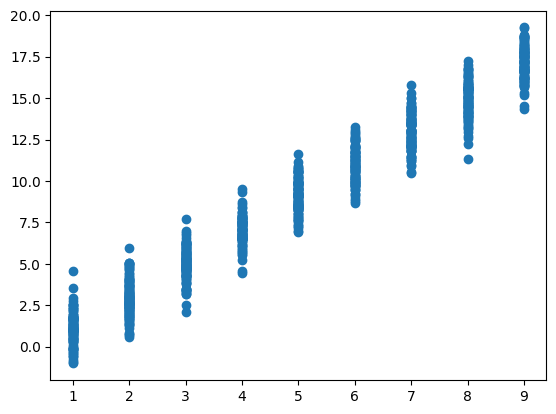

In [9]:
plt.scatter(X, y)
plt.show()

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer="sgd", loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.434801]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [12]:
# initial guessing
model.predict([10.0])

1/1 [==============================] - 4s 4s/step


array([[-14.34801]], dtype=float32)

In [13]:
model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 3ms/step - loss: 15.8300
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3315
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2615
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2095
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1657
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1367
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1056
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0957
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0845
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0714
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0672
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0439
Epoch 13/100
32/32 [================

In [14]:
model.predict([10.0])

1/1 [==============================] - 0s 30ms/step


array([[19.011398]], dtype=float32)

In [15]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9976374]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.9649747], dtype=float32)>]

# Intro Computer Vision

In [16]:
mnist = tf.keras.datasets.mnist

learn more at: https://tensorflow.org/datasets

In [17]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [18]:
training_images.shape

(60000, 28, 28)

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

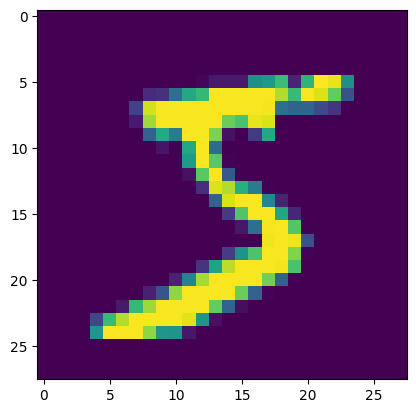

In [19]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [20]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [21]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(28, 28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dense(10, activation="softmax")
                                    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
hist = model.fit(training_images, training_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2862 - accuracy: 0.9175 - val_loss: 0.1540 - val_accuracy: 0.9553
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1309 - accuracy: 0.9614 - val_loss: 0.1248 - val_accuracy: 0.9632
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0894 - accuracy: 0.9728 - val_loss: 0.1055 - val_accuracy: 0.9688
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9801 - val_loss: 0.1018 - val_accuracy: 0.9700
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0953 - val_accuracy: 0.9718


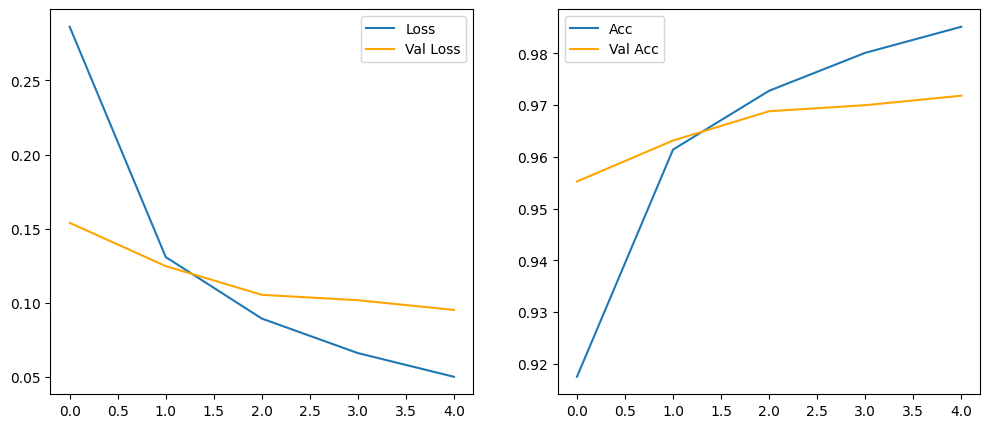

In [23]:
visualize_metrics(hist)

7


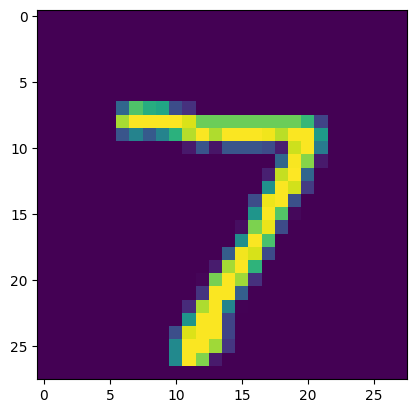

In [24]:
test_image = test_images[0]
test_label = test_labels[0]

plt.imshow(test_image)
print(test_label)

In [25]:
prepro_test_image = np.expand_dims(test_image, axis=0)
out = model.predict(prepro_test_image)

print(out)

1/1 [==============================] - 0s 69ms/step
[[8.1289802e-09 1.1405185e-08 5.8715891e-06 1.5221212e-04 3.5484915e-13
  1.1535796e-08 1.4357308e-14 9.9984181e-01 4.8415743e-08 9.4974403e-08]]


In [26]:
predicted_label = np.argmax(out)
predicted_conf = out[0][predicted_label]

print(f"predicted: {predicted_label} with confidency {predicted_conf * 100:.2f}%")

predicted: 7 with confidency 99.98%


## Let's upgrade our data a little bit more complex

In [27]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
print(training_images.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

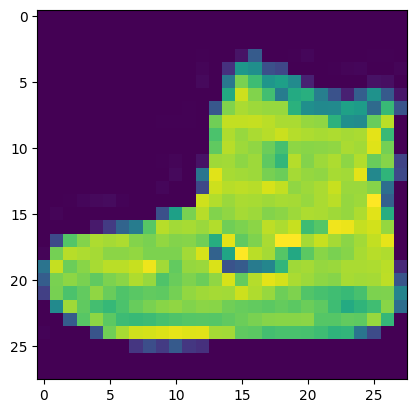

In [28]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

quoting from original homepage, [Fashion MNIST Github](https://github.com/zalandoresearch/fashion-mnist)

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [29]:




training_images  = training_images / 255.0
test_images = test_images / 255.0

In [30]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(28, 28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dense(10, activation="softmax")
                                    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
hist = model.fit(training_images, training_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5235 - accuracy: 0.8180 - val_loss: 0.4251 - val_accuracy: 0.8504
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3928 - accuracy: 0.8593 - val_loss: 0.4012 - val_accuracy: 0.8496
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3490 - accuracy: 0.8724 - val_loss: 0.3631 - val_accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3243 - accuracy: 0.8804 - val_loss: 0.3390 - val_accuracy: 0.8774
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3023 - accuracy: 0.8891 - val_loss: 0.3367 - val_accuracy: 0.8795


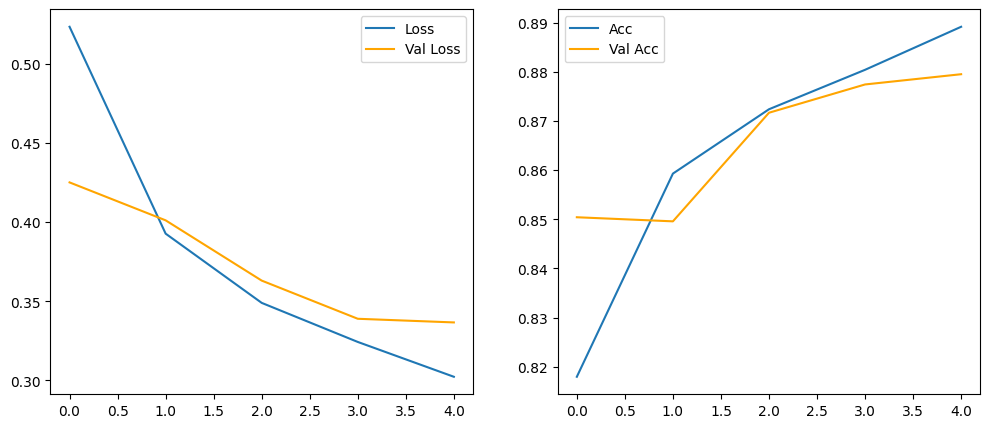

In [32]:
visualize_metrics(hist)

9


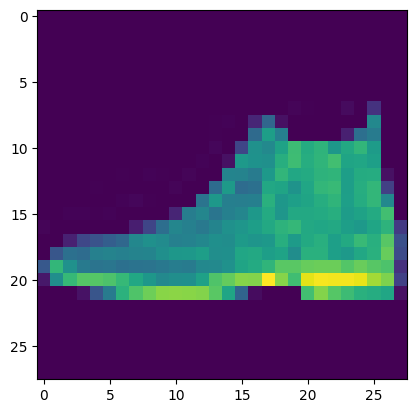

In [33]:
test_image = test_images[0]
test_label = test_labels[0]

plt.imshow(test_image)
print(test_label)

In [34]:
prepro_test_image = np.expand_dims(test_image, axis=0)
out = model.predict(prepro_test_image)

print(out)

1/1 [==============================] - 0s 69ms/step
[[1.9010248e-06 2.0476621e-08 8.3389386e-07 4.2593182e-08 2.1263479e-06
  1.0060859e-02 1.8602136e-06 3.1501506e-02 7.9063691e-05 9.5835185e-01]]


In [35]:
predicted_label = np.argmax(out)
predicted_conf = out[0][predicted_label]

print(f"predicted: {predicted_label} with confidency {predicted_conf * 100:.2f}%")

predicted: 9 with confidency 95.84%


In [36]:
hist2 = model.fit(training_images, training_labels, validation_split=0.2, epochs=100)

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2862 - accuracy: 0.8955 - val_loss: 0.3320 - val_accuracy: 0.8792
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.8978 - val_loss: 0.3217 - val_accuracy: 0.8832
Epoch 3/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2628 - accuracy: 0.9021 - val_loss: 0.3405 - val_accuracy: 0.8758
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2515 - accuracy: 0.9064 - val_loss: 0.3170 - val_accuracy: 0.8895
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2400 - accuracy: 0.9100 - val_loss: 0.3169 - val_accuracy: 0.8885
Epoch 6/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2352 - accuracy: 0.9117 - val_loss: 0.3181 - val_accuracy: 0.8910
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2250 - accuracy: 0.9154 - val_loss: 0.3351 - val_ac

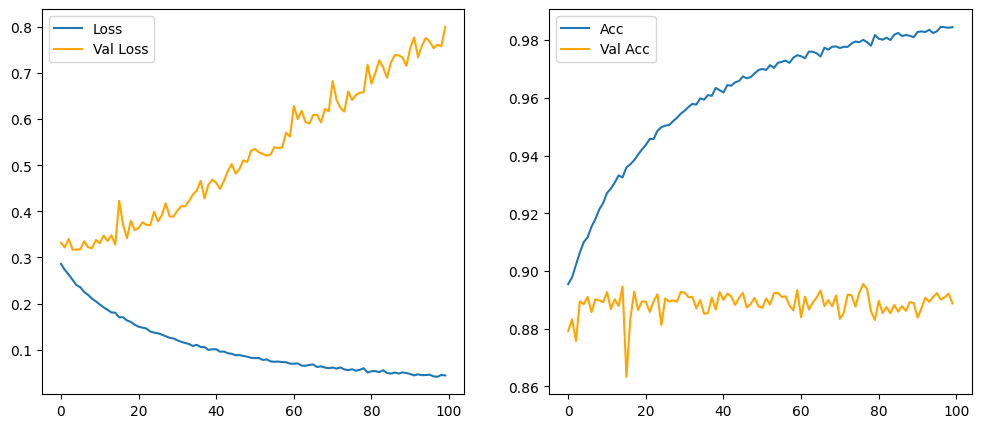

In [37]:
visualize_metrics(hist2)

This is the perfect example of overfitting. Our model become so good in predicting training data, but worse when predicting data that it's never seen before

## Improvising Computer Vision with CNN

In [38]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [39]:
hist = cnn_model.fit(training_images, training_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 13s 5ms/step - loss: 0.4776 - accuracy: 0.8264 - val_loss: 0.3566 - val_accuracy: 0.8774
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3179 - accuracy: 0.8842 - val_loss: 0.3077 - val_accuracy: 0.8895
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2706 - accuracy: 0.9007 - val_loss: 0.2975 - val_accuracy: 0.8913
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2363 - accuracy: 0.9119 - val_loss: 0.2678 - val_accuracy: 0.9032
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2076 - accuracy: 0.9224 - val_loss: 0.2551 - val_accuracy: 0.9082


it's even reach accuracy on 90% just after 4 epochs

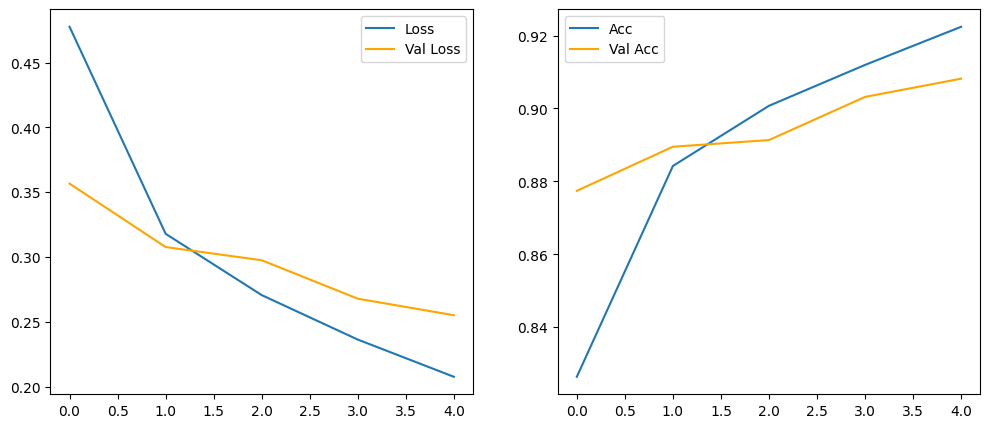

In [40]:
visualize_metrics(hist)

In [41]:
hist2 = cnn_model.fit(training_images, training_labels, batch_size=64, validation_split=0.2, epochs=100)

Epoch 1/100
750/750 [==============================] - 5s 6ms/step - loss: 0.1597 - accuracy: 0.9408 - val_loss: 0.2425 - val_accuracy: 0.9126
Epoch 2/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1440 - accuracy: 0.9471 - val_loss: 0.2423 - val_accuracy: 0.9127
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1304 - accuracy: 0.9515 - val_loss: 0.2591 - val_accuracy: 0.9139
Epoch 4/100
750/750 [==============================] - 4s 6ms/step - loss: 0.1160 - accuracy: 0.9572 - val_loss: 0.2559 - val_accuracy: 0.9138
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1038 - accuracy: 0.9611 - val_loss: 0.2586 - val_accuracy: 0.9143
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0928 - accuracy: 0.9647 - val_loss: 0.2668 - val_accuracy: 0.9172
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0812 - accuracy: 0.9699 - val_loss: 0.2929 - val_accuracy: 0.9153

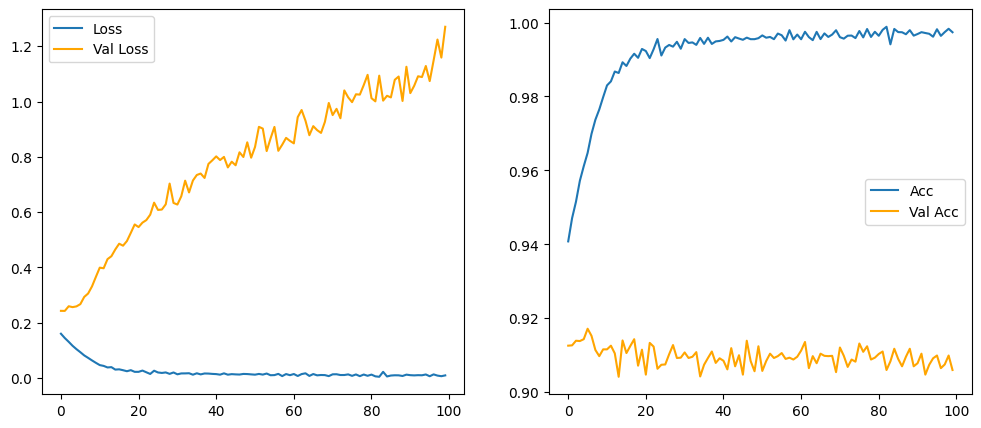

In [42]:
visualize_metrics(hist2)

At some epoch val_accuracy did reach 90% but over all it's still suffer from overfitting, let's see what we can do

## Defining Callbacks

In [43]:
# early stop custom callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [44]:
cnn_model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)       

In [45]:
hist4 = cnn_model_2.fit(
    training_images,
    training_labels,
    batch_size=64,
    validation_split=0.2,
    epochs=100,
    callbacks=[myCallback()]
)

Epoch 1/100
750/750 [==============================] - 9s 7ms/step - loss: 0.6087 - accuracy: 0.7863 - val_loss: 0.3960 - val_accuracy: 0.8572
Epoch 2/100
750/750 [==============================] - 4s 6ms/step - loss: 0.4198 - accuracy: 0.8467 - val_loss: 0.3463 - val_accuracy: 0.8739
Epoch 3/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3789 - accuracy: 0.8609 - val_loss: 0.3396 - val_accuracy: 0.8747
Epoch 4/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3516 - accuracy: 0.8712 - val_loss: 0.3336 - val_accuracy: 0.8800
Epoch 5/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3294 - accuracy: 0.8797 - val_loss: 0.4166 - val_accuracy: 0.8500
Epoch 6/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3181 - accuracy: 0.8837 - val_loss: 0.3080 - val_accuracy: 0.8864
Epoch 7/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3026 - accuracy: 0.8885 - val_loss: 0.3058 - val_accuracy: 0.8880

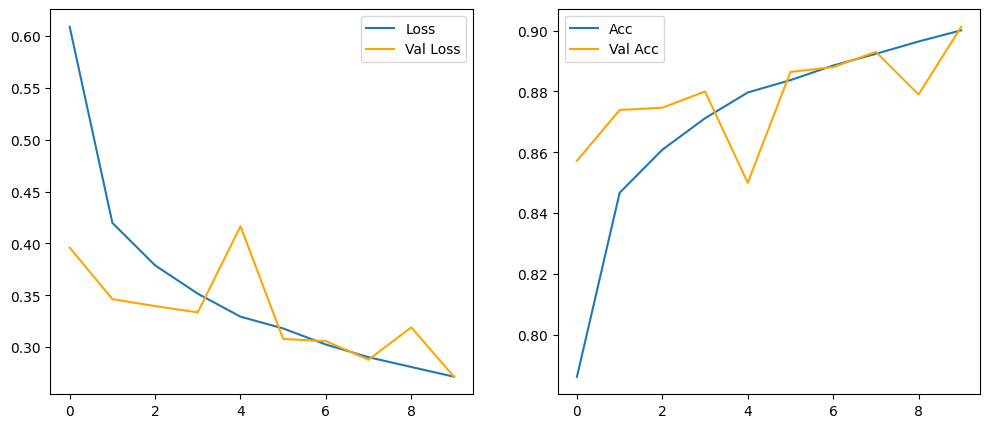

In [46]:
visualize_metrics(hist4)

## More Callbacks

In [47]:
cnn_model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model_3.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 11, 11, 64)       

In [48]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=1e-2, patience=10, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=1e-1, patience=5, verbose=1, min_delta=1e-2)

In [49]:
hist5 = cnn_model_3.fit(
    training_images,
    training_labels,
    batch_size=64,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stop, reduce_lr_on_plateau]
)

Epoch 1/100
750/750 [==============================] - 6s 6ms/step - loss: 0.5791 - accuracy: 0.7916 - val_loss: 0.6538 - val_accuracy: 0.7613 - lr: 0.0100
Epoch 2/100
750/750 [==============================] - 4s 6ms/step - loss: 0.4226 - accuracy: 0.8434 - val_loss: 0.4176 - val_accuracy: 0.8429 - lr: 0.0100
Epoch 3/100
750/750 [==============================] - 5s 7ms/step - loss: 0.3861 - accuracy: 0.8588 - val_loss: 0.3428 - val_accuracy: 0.8754 - lr: 0.0100
Epoch 4/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3656 - accuracy: 0.8644 - val_loss: 0.3489 - val_accuracy: 0.8719 - lr: 0.0100
Epoch 5/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3549 - accuracy: 0.8701 - val_loss: 0.3333 - val_accuracy: 0.8784 - lr: 0.0100
Epoch 6/100
750/750 [==============================] - 5s 7ms/step - loss: 0.3418 - accuracy: 0.8751 - val_loss: 0.5340 - val_accuracy: 0.8295 - lr: 0.0100
Epoch 7/100
750/750 [==============================] - 4s 6ms/st

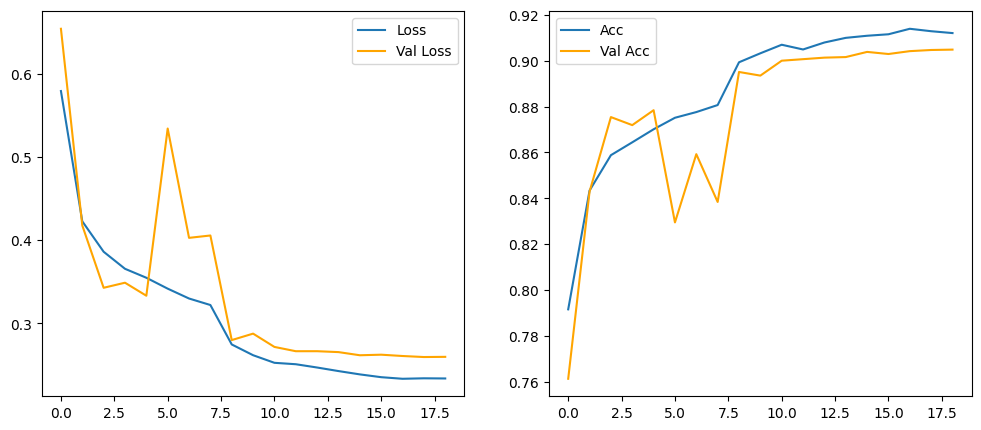

In [50]:
visualize_metrics(hist5)

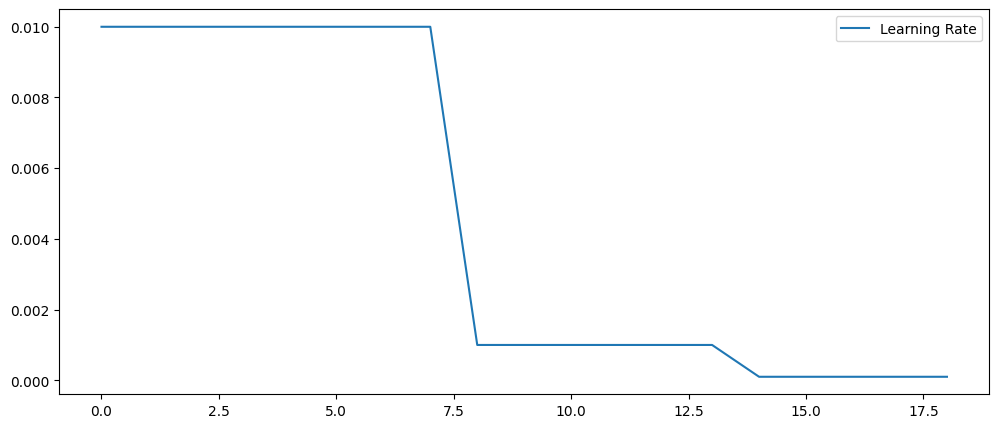

In [51]:
visualize_learning_rate(hist5)

In [52]:
prepro_test_image = np.expand_dims(test_image, axis=0)
out = cnn_model_3.predict(prepro_test_image)

print(out)

1/1 [==============================] - 0s 172ms/step
[[2.5398590e-06 6.2588759e-07 1.2609069e-06 1.4345469e-06 1.1305245e-07
  1.4295471e-04 8.8594129e-07 9.8417839e-03 4.6777990e-05 9.8996162e-01]]


In [53]:
predicted_label = np.argmax(out)
predicted_conf = out[0][predicted_label]

print(f"predicted: {predicted_label} with confidency {predicted_conf * 100:.2f}%")

predicted: 9 with confidency 99.00%


In [54]:
# saving the model
cnn_model_3.save("./cnn_model_3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Inspecting inside the model

1/1 [==============================] - 0s 17ms/step


<Figure size 2000x1200 with 0 Axes>

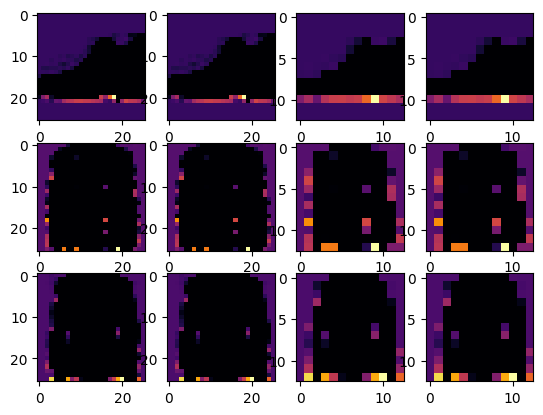

In [55]:
plt.figure(figsize=(20, 12))
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in cnn_model_3.layers]
activation_model = tf.keras.models.Model(inputs = cnn_model_3.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Move on to Real World Data

Unfortunately real world images out there not simply consist of 28x28 grayscale images. Current commonly used resolution is 1280x720 at least, and can be up to 8K. How can we fit those images into our networks?

1. the images os not squared
2. the images are now RGB
3. the size of our images may not fitted or RAM